<a href="https://colab.research.google.com/github/thainazanfolin/min_sleep_efficiency/blob/main/Projeto_Min_Sleep_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Projeto de Análise de dados: como os fatores de Estilo de Vida influenciam a Eficiência do Sono

- [Link do dataset no Kaggle](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data)

## Objetivo do projeto
Realizar uma análise sobre como diferentes hábitos podem ou não afetar a eficiência do sono, considerando tempo de sono e também sua qualidade.

## Sobre o Conjunto de Dados
O conjunto de dados contém informações sobre um grupo de sujeitos de teste e seus padrões de sono.
- **Subject ID**: Identificação exclusiva de cada sujeito, com idade e gênero registrados.
- **Bedtime**: Hora em que cada sujeito vai para a cama.
- **Wakeup time**: Hora em que cada sujeito acorda.
- **Sleep duration**: Total de tempo dormido em horas.
- **Sleep efficiency**: Proporção do tempo na cama que foi realmente gasto dormindo.
- **REM sleep percentage**: Tempo gasto em sono REM.
- **Deep sleep percentage**: Tempo gasto em sono profundo.
- **Light sleep percentage**: Tempo gasto em sono leve.
- **Awakenings**: Número de vezes que cada sujeito acorda durante a noite.
- **Caffeine consumption**: Consumo de cafeína nas 24 horas anteriores à hora de dormir. (mg)
- **Alcohol consumption**: Consumo de álcool nas 24 horas anteriores à hora de dormir. (oz)
- **Smoking status**: Estado de fumante de cada sujeito.
- **Exercise frequency**: Frequência de exercícios de cada sujeito. (horas)



## Vamos importar a nossa base de dados.
 Optamos por trazer por URL para facilitar o trabalho de todos os membros da equipe em um só colab. <br> Porém, também pode ser feito subindo a base aqui no Colab, normalmente. <br><br>
Vamos começar!

In [22]:
#importando as bibliotecas necessárias
import pandas as pd
import time
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
# trazendo o database de uma url externa

url = 'https://raw.githubusercontent.com/thainazanfolin/min_sleep_efficiency/refs/heads/main/Sleep_Efficiency_table.csv'
df = pd.read_csv(url, delimiter=';')

# Verifique as primeiras linhas do DataFrame
print(df.head(10))


   ID  Age  Gender           Bedtime       Wakeup time  Sleep duration  \
0   1   65  Female  06/03/2021 01:00  06/03/2021 07:00             6.0   
1   2   69    Male  05/12/2021 02:00  05/12/2021 09:00             7.0   
2   3   40  Female  25/05/2021 21:30  25/05/2021 05:30             8.0   
3   4   40  Female  03/11/2021 02:30  03/11/2021 08:30             6.0   
4   5   57    Male  13/03/2021 01:00  13/03/2021 09:00             8.0   
5   6   36  Female  01/07/2021 21:00  01/07/2021 04:30             7.5   
6   7   27  Female  21/07/2021 21:00  21/07/2021 03:00             6.0   
7   8   53    Male  16/08/2021 00:30  16/08/2021 10:30            10.0   
8   9   41  Female  05/04/2021 02:30  05/04/2021 08:30             6.0   
9  10   11  Female  16/09/2021 01:00  16/09/2021 10:00             9.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19        

In [4]:
# Observando as informações gerais sobre o dataset, incluindo tipos de dados e valores nulos
df.info()

print('-------')

# Verificar se há linhas duplicadas
linhas_duplicadas = df.duplicated().sum()
print(f"Número de linhas duplicadas: {linhas_duplicadas}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

A partir das informações da tabela conseguimos verificar que:

* existem **452 registros** totais
* nas colunas 'Awakenings', 'Caffeine consumption', 'Alcohol consumption' e 'Exercise frequency' **existem dados faltantes (nulos)**
* não existem linhas duplicadas   

Vamos trazer mais dados sobre os valores nulos para decidir como vamos fazer a limpeza dos dados.

In [5]:
#vamos ver quantos nulos temos em cada coluna

null_awakenings = df['Awakenings'].isnull().sum()
print(f"Número de nulos em Awakenings: {null_awakenings}")

null_caffeine = df['Caffeine consumption'].isnull().sum()
print(f"Número de nulos em Caffeine consumption: {null_caffeine}")

null_alcohol = df['Alcohol consumption'].isnull().sum()
print(f"Número de nulos em Alcohol consumption: {null_alcohol}")

null_exercise = df['Exercise frequency'].isnull().sum()
print(f"Número de nulos em Exercise frequency: {null_exercise}")


# Total de nulos no dataframe
sum_null = sum([null_awakenings, null_caffeine, null_alcohol, null_exercise])
print(f"Total de nulos no dataframe: {sum_null}")


Número de nulos em Awakenings: 20
Número de nulos em Caffeine consumption: 25
Número de nulos em Alcohol consumption: 14
Número de nulos em Exercise frequency: 6
Total de nulos no dataframe: 65


Como vimos, temos o total de 65 valores em branco no dataframe. Nossas opções para limpar esses dados são:

1. excluir as linhas com dados faltantes
2. preencher os dados faltantes com a média dos outros valores (verificar se faz sentido)
3. preencher os dados faltantes com o dado presente em outro caso semelhante (podemos fazer um order by por idade e genero, por exemplo, e trazer o mesmo dado).

Considerando que nossa database tem poucos registros, vamos fazer a opção 1 e 2, para não perder registros. Porém, vamos verificar o dado faltante de acordo com a coluna. <br><br>

Vamos retomar as informações da database, considerando o que nossas colunas trazem:
* Awakenings: Número de vezes que cada sujeito acorda durante a noite
<br>**(é possível fazer uma média entre todos e preencher)** <br><br>

* Caffeine consumption: Consumo de cafeína nas 24 horas anteriores à hora de dormir.
<br>**(é possível fazer uma média entre todos e preencher, porém é importante verificar antes a quantidade de ZEROS presentes, pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros)** <br><br>

* Alcohol consumption: Consumo de álcool nas 24 horas anteriores à hora de dormir. <br>**(é possível fazer uma média entre todos e preencher, porém é importante verificar antes a quantidade de ZEROS presentes, pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros)**<br><br>

* Exercise frequency: Frequência de exercícios de cada sujeito.
<br>**(é possível fazer uma média entre todos e preencher)**
<br> **(vale observar que a única coluna com um volume baixo de linhas faltantes é o 'Exercise frequency'. valeria apagar apenas os registros com essa coluna nula?)** <br>




In [6]:
# todo: fazer aqui o que está acima em blocos separados
# BLOCO Awakenings: é possível fazer uma média entre todos e preencher

aw_size_original = df['Awakenings'].count()
print(f'Tamanho original da coluna Awakenings: {aw_size_original}')
print('--------')

#Calculando a média de vezes que as pessoas acordam durante a noite
awakenings_total = df['Awakenings'].sum()
media_aw = awakenings_total / df['Awakenings'].size
media_aw = math.ceil(media_aw)

print(f'Média de vezes que as pessoas despertaram: {media_aw}')
print('--------')

# A MÉDIA DE VEZES QUE AS PESSOAS ACORDAM DURANTE A NOITE É DE 2x

# Preencher os valores nulos com a média
df['Awakenings'] = df['Awakenings'].fillna(media_aw)

# Verificar se os valores nulos foram preenchidos
print(f"Total de registros com os nulos preenchidos: {df['Awakenings'].count()} ")

print('--------')




Tamanho original da coluna Awakenings: 432
--------
Média de vezes que as pessoas despertaram: 2
--------
Total de registros com os nulos preenchidos: 452 
--------


In [7]:
# BLOCO Caffeine consumption: é possível fazer uma média entre todos e preencher.
# Porém é importante verificar antes a quantidade de ZEROS presentes,
# pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros

# todo: somar a quantidade de zeros nessa coluna para avaliar


cf_size_original = df['Caffeine consumption'].count()
print(f'Tamanho original da coluna Caffeine consumption: {cf_size_original}')
print('--------')

zeros_cafe = (df['Caffeine consumption'] == 0).sum()

# Usando a média ponderada como explicado abaixo
media_ponderada = (df['Caffeine consumption'] * df['Caffeine consumption']).sum() / df['Caffeine consumption'].sum()

print(f"Quantidade de zeros na coluna Caffeine consumption: {zeros_cafe}")
print('--------')

print(f"Média ponderada da coluna Caffeine consumption: {media_ponderada.round(2)}")
print('--------')

df['Caffeine consumption'] = df['Caffeine consumption'].fillna(media_ponderada)

# Verificar se os valores nulos foram preenchidos
print(f"Total de registros com os nulos preenchidos: {df['Caffeine consumption'].count()} ")
print('--------')






Tamanho original da coluna Caffeine consumption: 427
--------
Quantidade de zeros na coluna Caffeine consumption: 211
--------
Média ponderada da coluna Caffeine consumption: 62.13
--------
Total de registros com os nulos preenchidos: 452 
--------


Média Ponderada (ou filtrada): Uma alternativa interessante seria calcular a média excluindo os zeros, pois isso representaria melhor o consumo para quem de fato ingere cafeína. Esse método evita que o excesso de zeros distorça o valor médio, mantendo uma aproximação mais realista para os valores nulos.

In [8]:
# BLOCO Alcohol consumption: é possível fazer uma média entre todos e preencher, porém é importante verificar antes a quantidade de ZEROS presentes,
# pois a média pode não representar a realidade. Interessante talvez saber se a maioria é 0, se sim, podemos preencher com zeros)

# todo

cf_size_original = df['Alcohol consumption'].count()
print(f'Tamanho original da coluna Alcohol consumption: {cf_size_original}')
print('--------')

zeros_cafe = (df['Alcohol consumption'] == 0).sum()

# Usando a média ponderada como explicado abaixo
media_ponderada = (df['Alcohol consumption'] * df['Alcohol consumption']).sum() / df['Alcohol consumption'].sum()

print(f"Quantidade de zeros na coluna Alcohol consumption: {zeros_cafe}")
print('--------')

print(f"Média ponderada da coluna Alcohol consumption: {media_ponderada.round(2)}")
print('--------')

df['Alcohol consumption'] = df['Alcohol consumption'].fillna(media_ponderada)

# Verificar se os valores nulos foram preenchidos
print(f"Total de registros com os nulos preenchidos: {df['Alcohol consumption'].count()} ")
print('--------')


# todo: somar a quantidade de zeros nessa coluna para avaliar


Tamanho original da coluna Alcohol consumption: 438
--------
Quantidade de zeros na coluna Alcohol consumption: 246
--------
Média ponderada da coluna Alcohol consumption: 3.41
--------
Total de registros com os nulos preenchidos: 452 
--------


In [9]:
# BLOCO Exercise frequency: (é possível fazer uma média entre todos e preencher)

ex_size_original = df['Exercise frequency'].count()
print(f'Tamanho original da coluna Exercise frequency: {ex_size_original}')
print('--------')

#Calculando a média de vezes que as pessoas acordam durante a noite
exercise_frequency_total = df['Exercise frequency'].sum()
media_ex = exercise_frequency_total / df['Exercise frequency'].size
media_ex = math.ceil(media_ex)

print(f'Média de vezes que as pessoas se exercitaram na semana: {media_ex}')
print('--------')

# Preencher os valores nulos com a média
df['Exercise frequency'] = df['Exercise frequency'].fillna(media_ex)

# Verificar se os valores nulos foram preenchidos
print(f"Total de registros com os nulos preenchidos: {df['Exercise frequency'].count()} ")

print('--------')



Tamanho original da coluna Exercise frequency: 446
--------
Média de vezes que as pessoas se exercitaram na semana: 2
--------
Total de registros com os nulos preenchidos: 452 
--------


Ainda focando em melhorar o dataframe, vimos que as colunas "Waketime" e "Bedtime" não estão no forma datetime, o que pode ser útil em uma análise futura. Vamos fazer essa conversão.

In [10]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'], errors='coerce')
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'], errors='coerce')

# vamos verificar se o Dtype dessas colunas mudaram de fato

# Selecionando as colunas desejadas
colunas_datatime = ['Bedtime', 'Wakeup time']
df_selecionado = df[colunas_datatime]

# Chamando o método info() no DataFrame selecionado
df_selecionado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Bedtime      189 non-null    datetime64[ns]
 1   Wakeup time  189 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 7.2 KB


# Resumo estatístico do Dataframe
Com a limpeza dos dados feita, vamos fazer uma análise geral do dataframe, focando em um resumo estatístico. O que pensamos em trazer:


Quantidade por gênero <br>
Média de tempo de sono <br>
Média de sono REM <br>
Eficiência do sono x Atividade Física <br>
Consumo de cafeína x Eficiencia do sono <br>
Eficiencia do sono x Tempo de sono


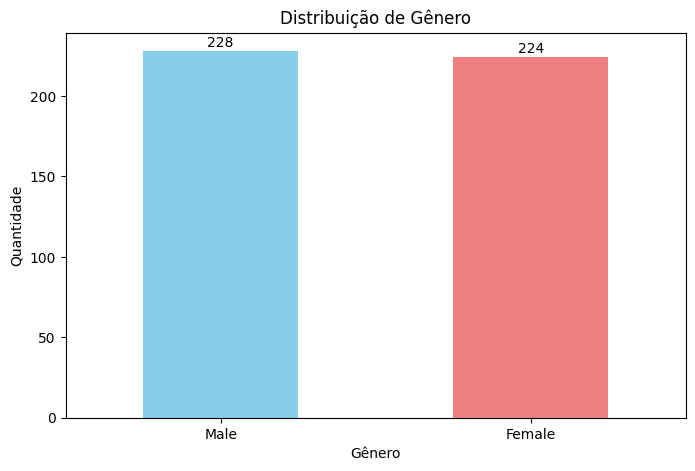

In [27]:
#Quantidade por gênero

# Contagem de homens e mulheres
contagem_genero = df['Gender'].value_counts()

# Gráfico de barras com contagem dentro das barras
ax = contagem_genero.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(8, 5))
plt.title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

# Adiciona os rótulos de contagem dentro de cada barra
for i, count in enumerate(contagem_genero):
    ax.text(i, count + 1, f'{count}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal
plt.show()




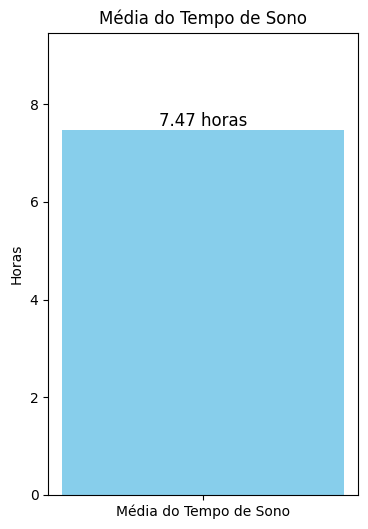

In [31]:
# Média de tempo de sono e Média de sono REM

media_tempo_sono = df['Sleep duration'].mean()

# Criar o gráfico de barras para exibir a média
plt.figure(figsize=(4, 6))
plt.bar(['Média do Tempo de Sono'], [media_tempo_sono], color='skyblue')
plt.ylabel('Horas')
plt.title('Média do Tempo de Sono')

# Adicionar a média como rótulo no topo da barra
plt.text(0, media_tempo_sono + 0.1, f'{media_tempo_sono:.2f} horas', ha='center', fontsize=12)
plt.ylim(0, media_tempo_sono + 2)  # Ajustar o limite para dar espaço ao rótulo

plt.show()


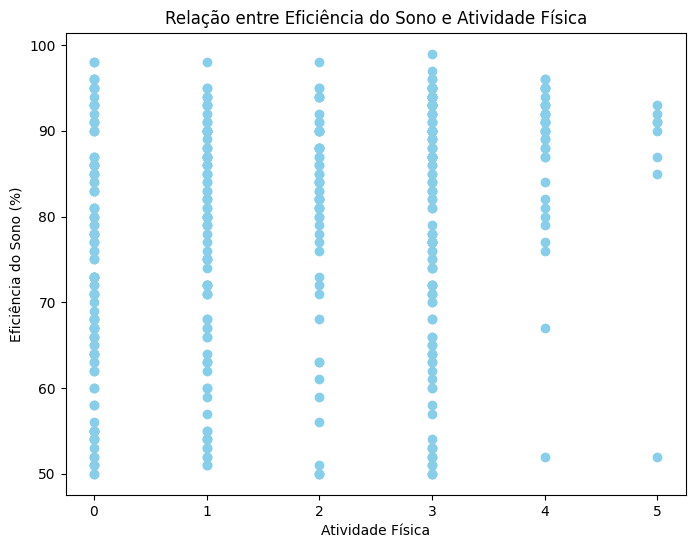

In [38]:
# Eficiência do sono x Atividade Física

# Supondo que as colunas sejam 'Sleep Efficiency' para eficiência do sono e 'Physical Activity' para atividade física
plt.figure(figsize=(8, 6))

# Criando o gráfico de dispersão
plt.scatter(df['Exercise frequency'], df['Sleep efficiency'] * 100, color='skyblue', alpha=1)
plt.title('Relação entre Eficiência do Sono e Atividade Física')
plt.xlabel('Atividade Física')
plt.ylabel('Eficiência do Sono (%)')

# Exibindo o gráfico
plt.show()

Explicar essa parte


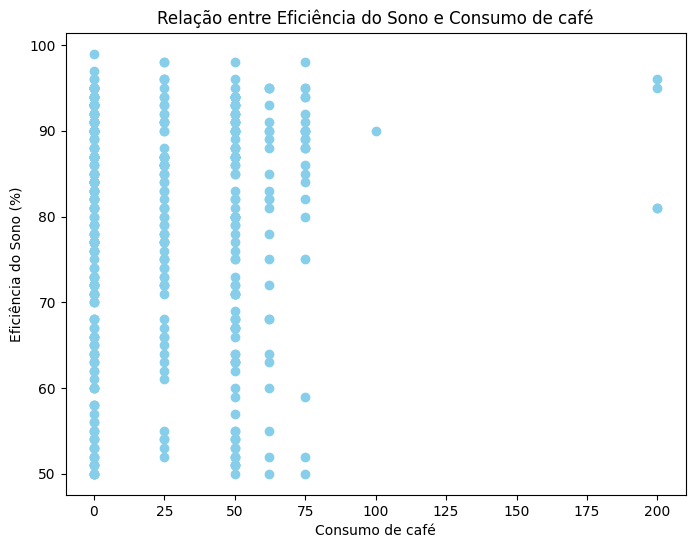

In [39]:
# Consumo de cafeína x Eficiencia do sono

# Supondo que as colunas sejam 'Sleep Efficiency' para eficiência do sono e 'Caffeine consumption' para Consumo de café
plt.figure(figsize=(8, 6))

# Criando o gráfico de dispersão
plt.scatter(df['Caffeine consumption'], df['Sleep efficiency'] * 100, color='skyblue', alpha=1)
plt.title('Relação entre Eficiência do Sono e Consumo de café')
plt.xlabel('Consumo de café')
plt.ylabel('Eficiência do Sono (%)')

# Exibindo o gráfico
plt.show()

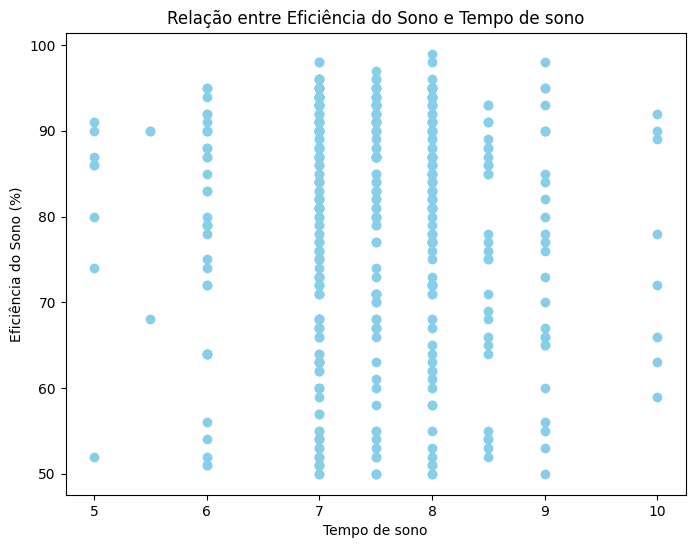

In [41]:
# Eficiência do sono x Tempo de sono

# Supondo que as colunas sejam 'Sleep Efficiency' para eficiência do sono e 'Sleep duration' para Tempo de sono
plt.figure(figsize=(8, 6))

# Criando o gráfico de dispersão
plt.scatter(df['Sleep duration'], df['Sleep efficiency'] * 100, color='skyblue', alpha=1)
plt.title('Relação entre Eficiência do Sono e Tempo de sono')
plt.xlabel('Tempo de sono')
plt.ylabel('Eficiência do Sono (%)')

# Exibindo o gráfico
plt.show()

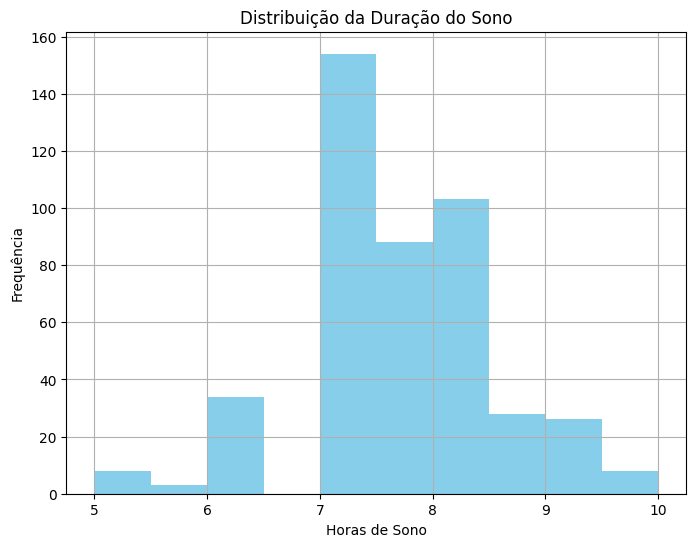

In [42]:
df.describe()

unique_counts = df.nunique()

# Exemplo para uma coluna categórica como 'Gender'
gender_distribution = df['Gender'].value_counts()

df['Sleep duration'].hist(bins=10, figsize=(8,6), color='skyblue')
plt.title('Distribuição da Duração do Sono')
plt.xlabel('Horas de Sono')
plt.ylabel('Frequência')
plt.show()




Apartir deste grafico conseguimos ver que a maioria dos registros tem entre 7:00 e 8:30 de sono